/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/2545349599.py:6: DtypeWarning: Columns (0,1,5,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETDs_sept23.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544592 entries, 0 to 544591
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      544583 non-null  object 
 1   id              544120 non-null  object 
 2   title           544089 non-null  object 
 3   author          544009 non-null  object 
 4   advisor         424034 non-null  object 
 5   year            477127 non-null  object 
 6   abstract        443570 non-null  object 
 7   university      534024 non-null  object 
 8   degree          427596 non-null  object 
 9   URI             542715 non-null  object 
 10  department      298718 non-null  object 
 11  discipline      376499 non-null  object 
 12  language        499467 non-null  object 
 13  schooltype      458032 non-null  object 
 14  oadsclassifier  544105 non-null  float64
 15  borndigital     544105 non-null  float64
dtypes: float64(2), object(14)
memory usage: 66.5+ MB
None
  

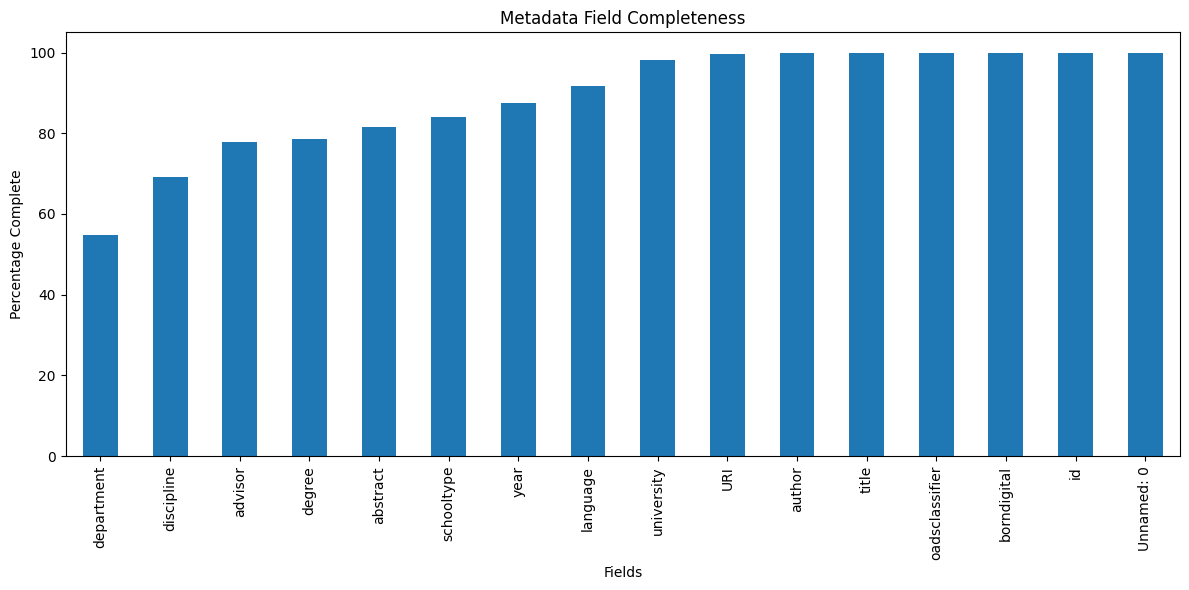


Summary Statistics:
       oadsclassifier    borndigital
count   544105.000000  544105.000000
mean         0.051894       0.266699
std          0.221814       0.442234
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%          0.000000       1.000000
max          1.000000       1.000000


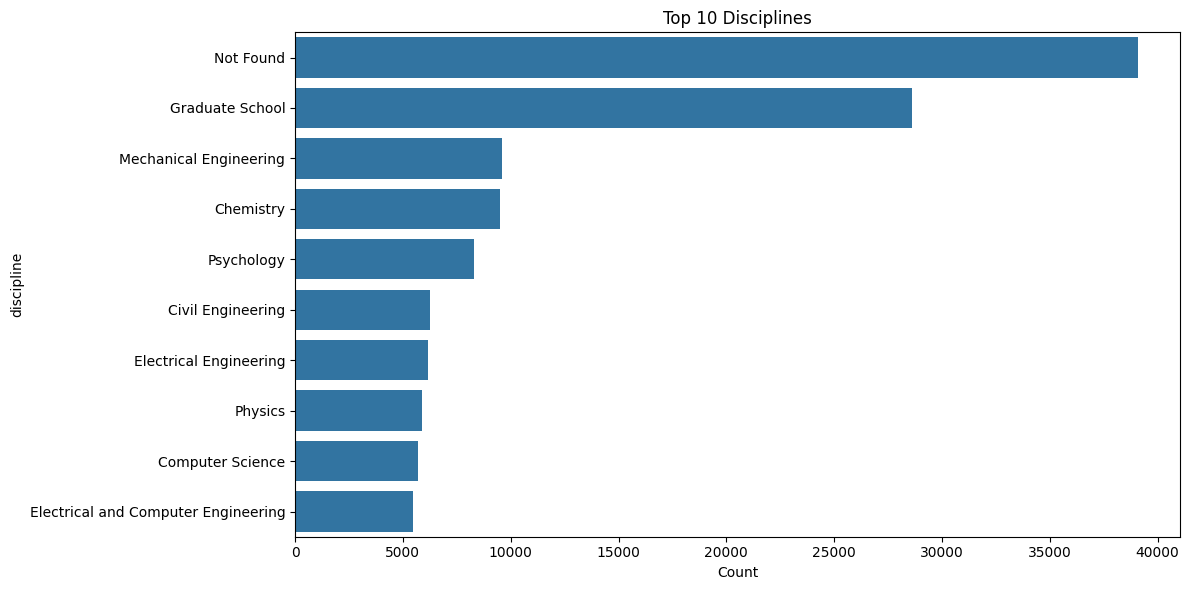

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

# Load the data
df = pd.read_csv('ETDs_sept23.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Calculate metadata completeness
completeness = (df.count() / len(df)) * 100

# Visualize completeness
plt.figure(figsize=(12, 6))
completeness.sort_values().plot(kind='bar')
plt.title('Metadata Field Completeness')
plt.ylabel('Percentage Complete')
plt.xlabel('Fields')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# If you have a 'submission_date' column, let's analyze submission trends
if 'submission_date' in df.columns:
    df['submission_date'] = pd.to_datetime(df['submission_date'])
    df['submission_year'] = df['submission_date'].dt.year
    
    yearly_submissions = df['submission_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    yearly_submissions.plot(kind='line', marker='o')
    plt.title('Number of ETD Submissions by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Submissions')
    plt.grid(True)
    plt.show()

# If you have a 'subject' or 'discipline' column, let's analyze subject distribution
subject_column = next((col for col in df.columns if col.lower() in ['subject', 'discipline']), None)
if subject_column:
    top_subjects = df[subject_column].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_subjects.values, y=top_subjects.index)
    plt.title(f'Top 10 {subject_column.capitalize()}s')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

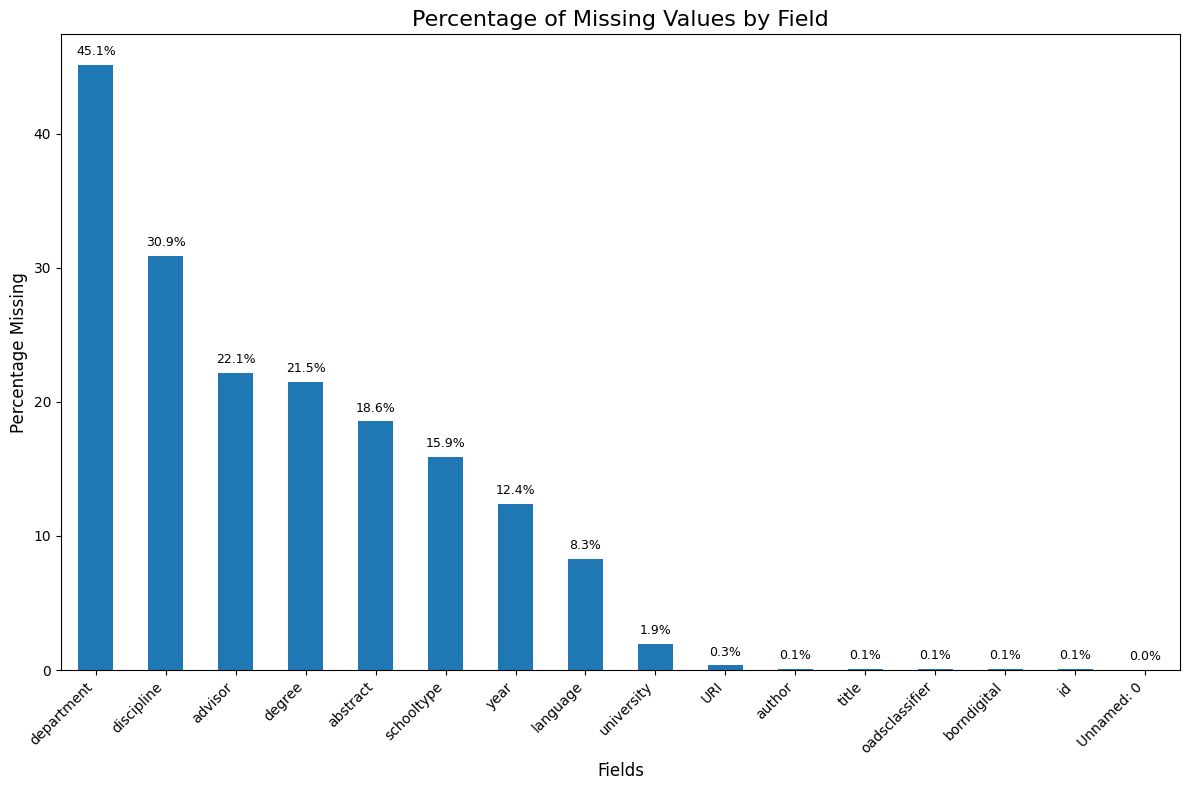

department        45.148295
discipline        30.865859
advisor           22.137306
degree            21.483239
abstract          18.550034
schooltype        15.894468
year              12.388173
language           8.286020
university         1.940535
URI                0.344662
author             0.107053
title              0.092363
oadsclassifier     0.089425
borndigital        0.089425
id                 0.086670
Unnamed: 0         0.001653
dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the missing percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
missing_percentage_sorted.plot(kind='bar')

plt.title('Percentage of Missing Values by Field', fontsize=16)
plt.ylabel('Percentage Missing', fontsize=12)
plt.xlabel('Fields', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of each bar
for i, v in enumerate(missing_percentage_sorted):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print the percentages
print(missing_percentage_sorted)

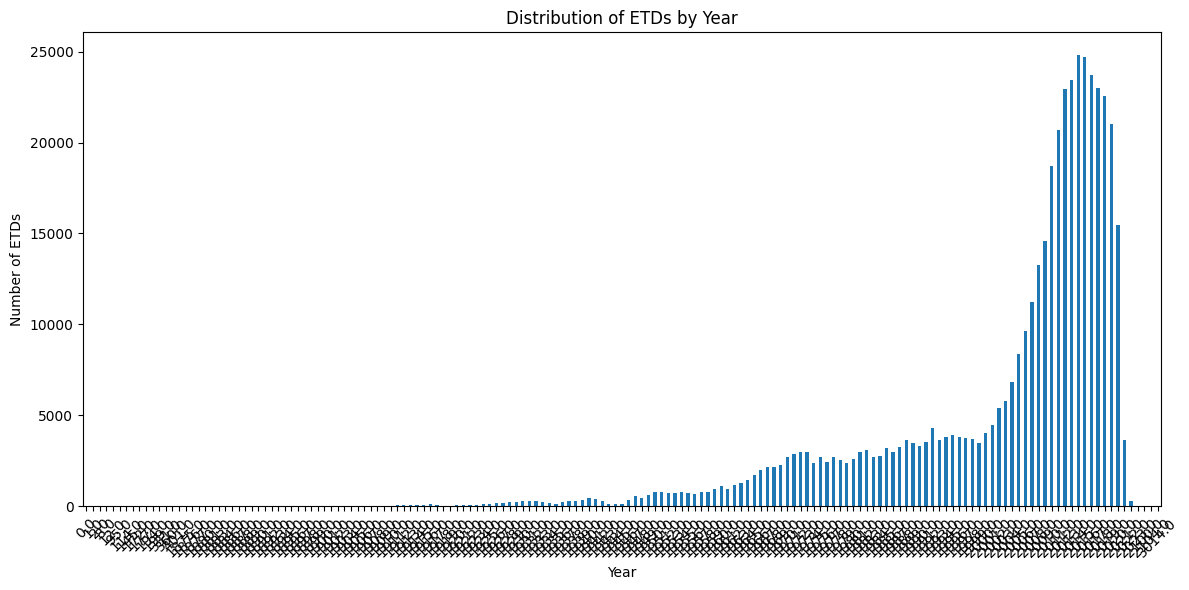

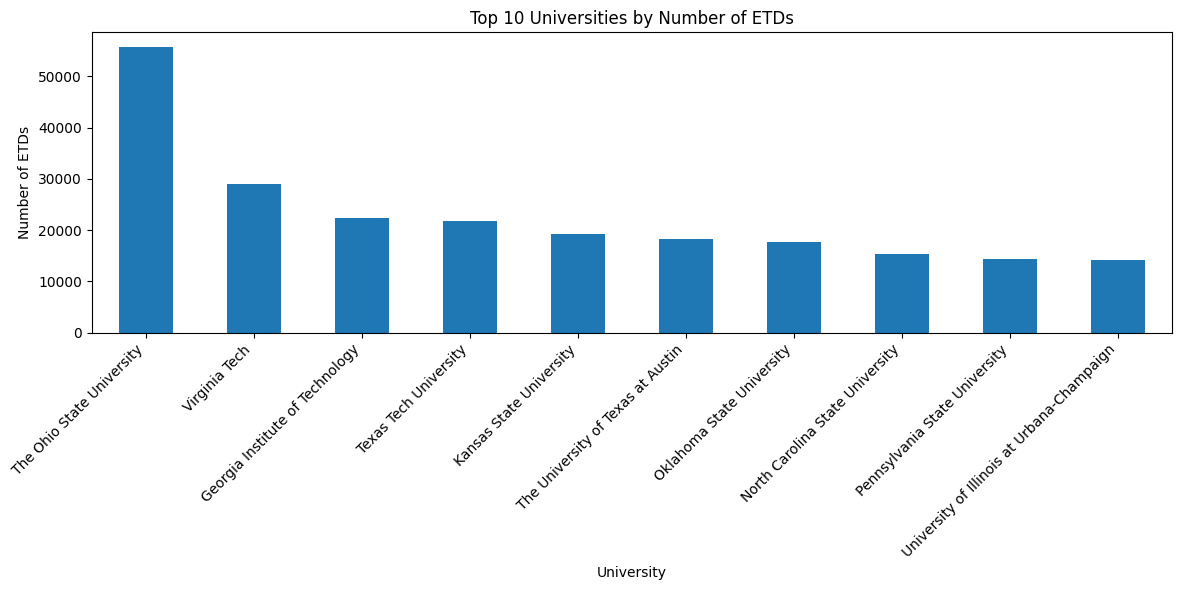

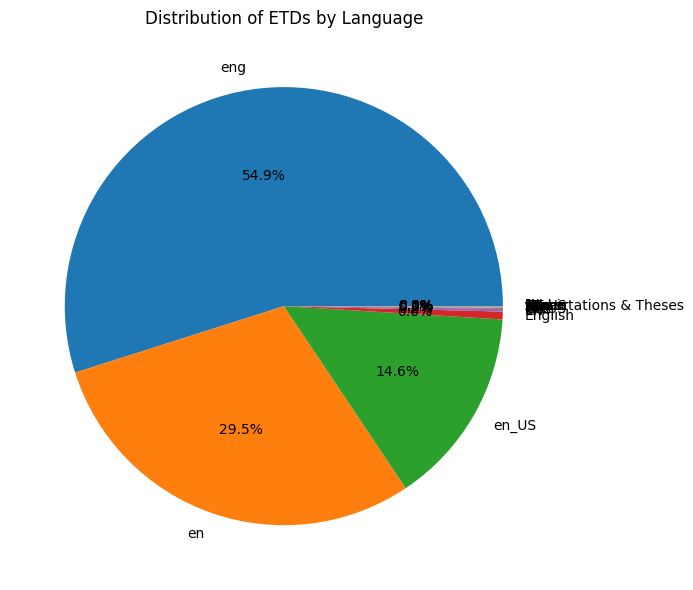

language
eng                       274239
en                        147260
en_US                      73140
English                     2862
EN                          1018
en-US                        347
spa                          200
fre                          127
es                           111
ger                           49
fr                            34
de                            19
deu                           18
Dissertations & Theses        11
haw                            7
SP                             5
other                          3
it                             2
es_US                          2
pt                             2
sp                             1
por                            1
esp                            1
US_en                          1
fra                            1
FR                             1
GE                             1
ES                             1
new                            1
tur                            1
A

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming it's already loaded as df)

# Convert year to numeric, handling errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Distribution by year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Distribution of ETDs by Year')
plt.xlabel('Year')
plt.ylabel('Number of ETDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 universities
top_universities = df['university'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_universities.plot(kind='bar')
plt.title('Top 10 Universities by Number of ETDs')
plt.xlabel('University')
plt.ylabel('Number of ETDs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Language distribution
language_counts = df['language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of ETDs by Language')
plt.ylabel('')
plt.tight_layout()
plt.show()

print(language_counts)

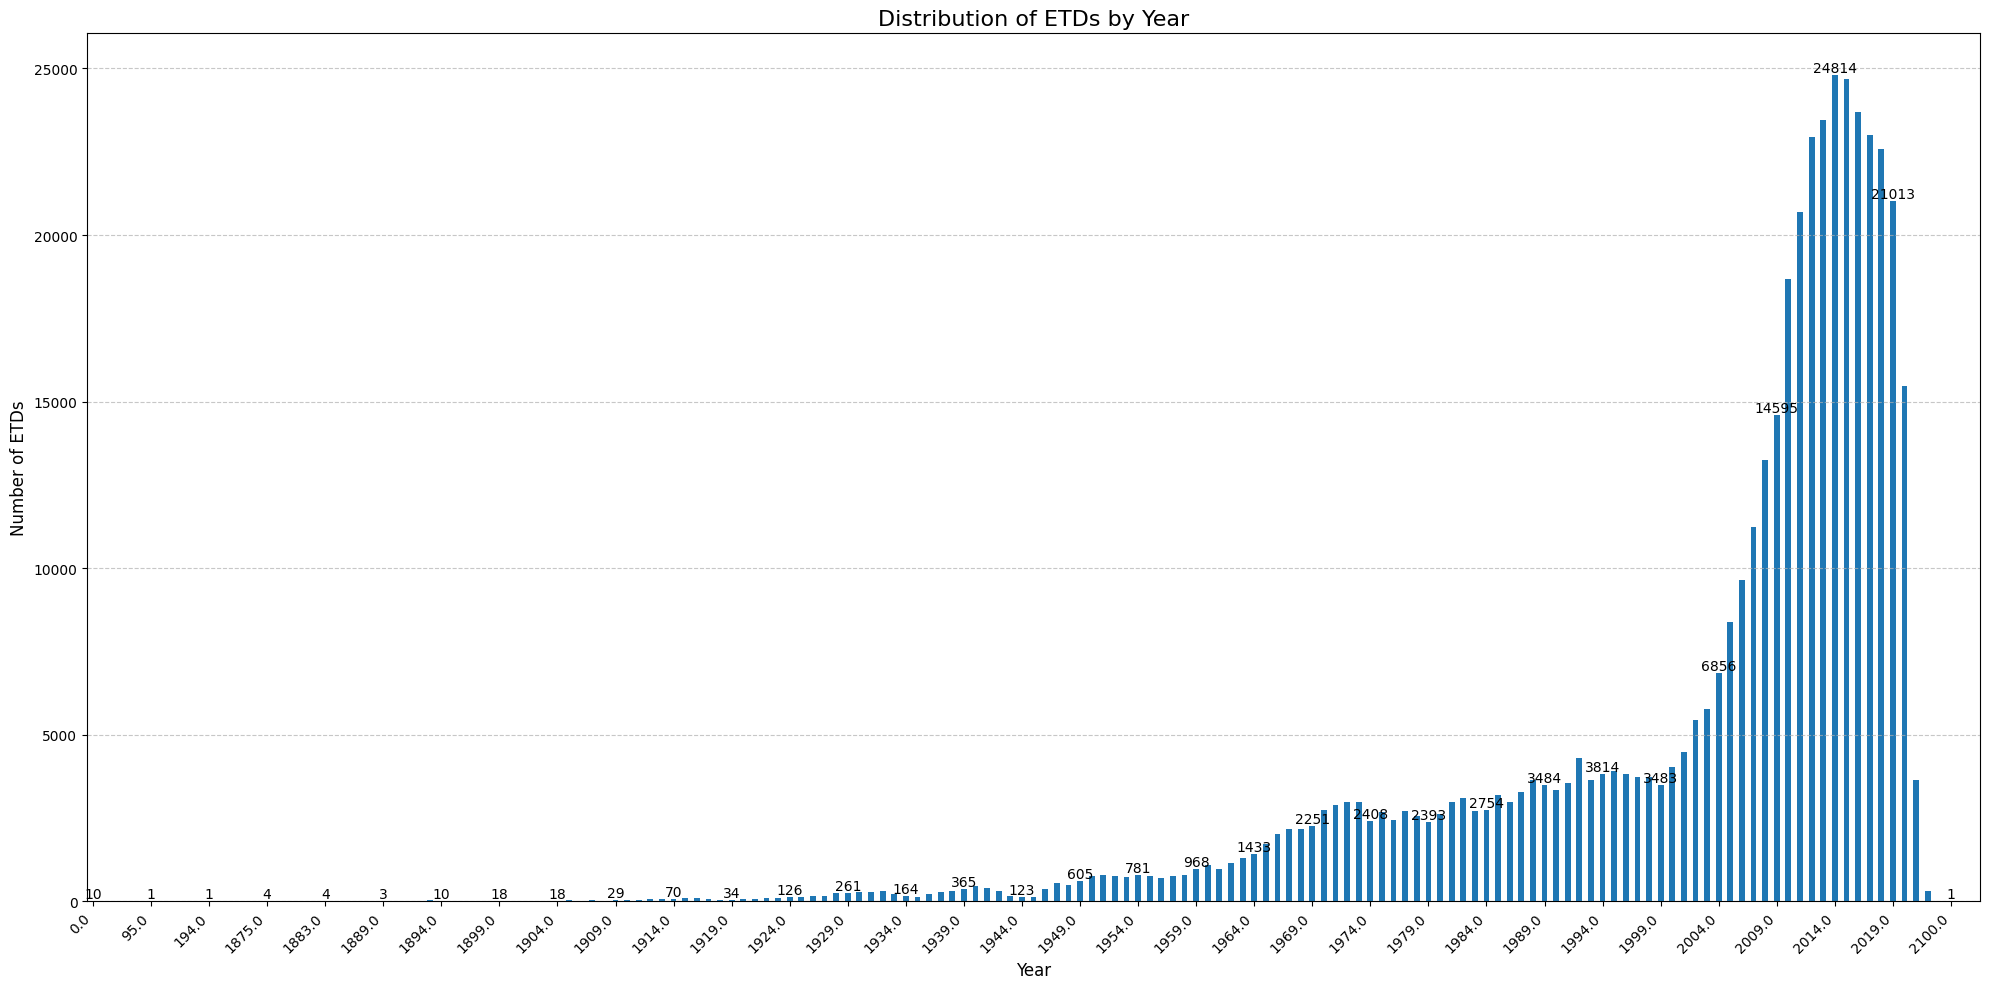

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))  # Increased figure size for better visibility
ax = year_counts.plot(kind='bar')

plt.title('Distribution of ETDs by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)

# Rotate x-axis labels and set them to appear only every 5 years
plt.xticks(range(0, len(year_counts), 5), [year_counts.index[i] for i in range(0, len(year_counts), 5)], rotation=45, ha='right')

# Add more space at the bottom to prevent cutting off labels
plt.subplots_adjust(bottom=0.2)

# Add gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, add value labels on top of each bar
for i, v in enumerate(year_counts):
    if i % 5 == 0:  # Only label every 5th bar to reduce clutter
        ax.text(i, v, str(v), ha='center', va='bottom')


plt.tight_layout()
plt.show()

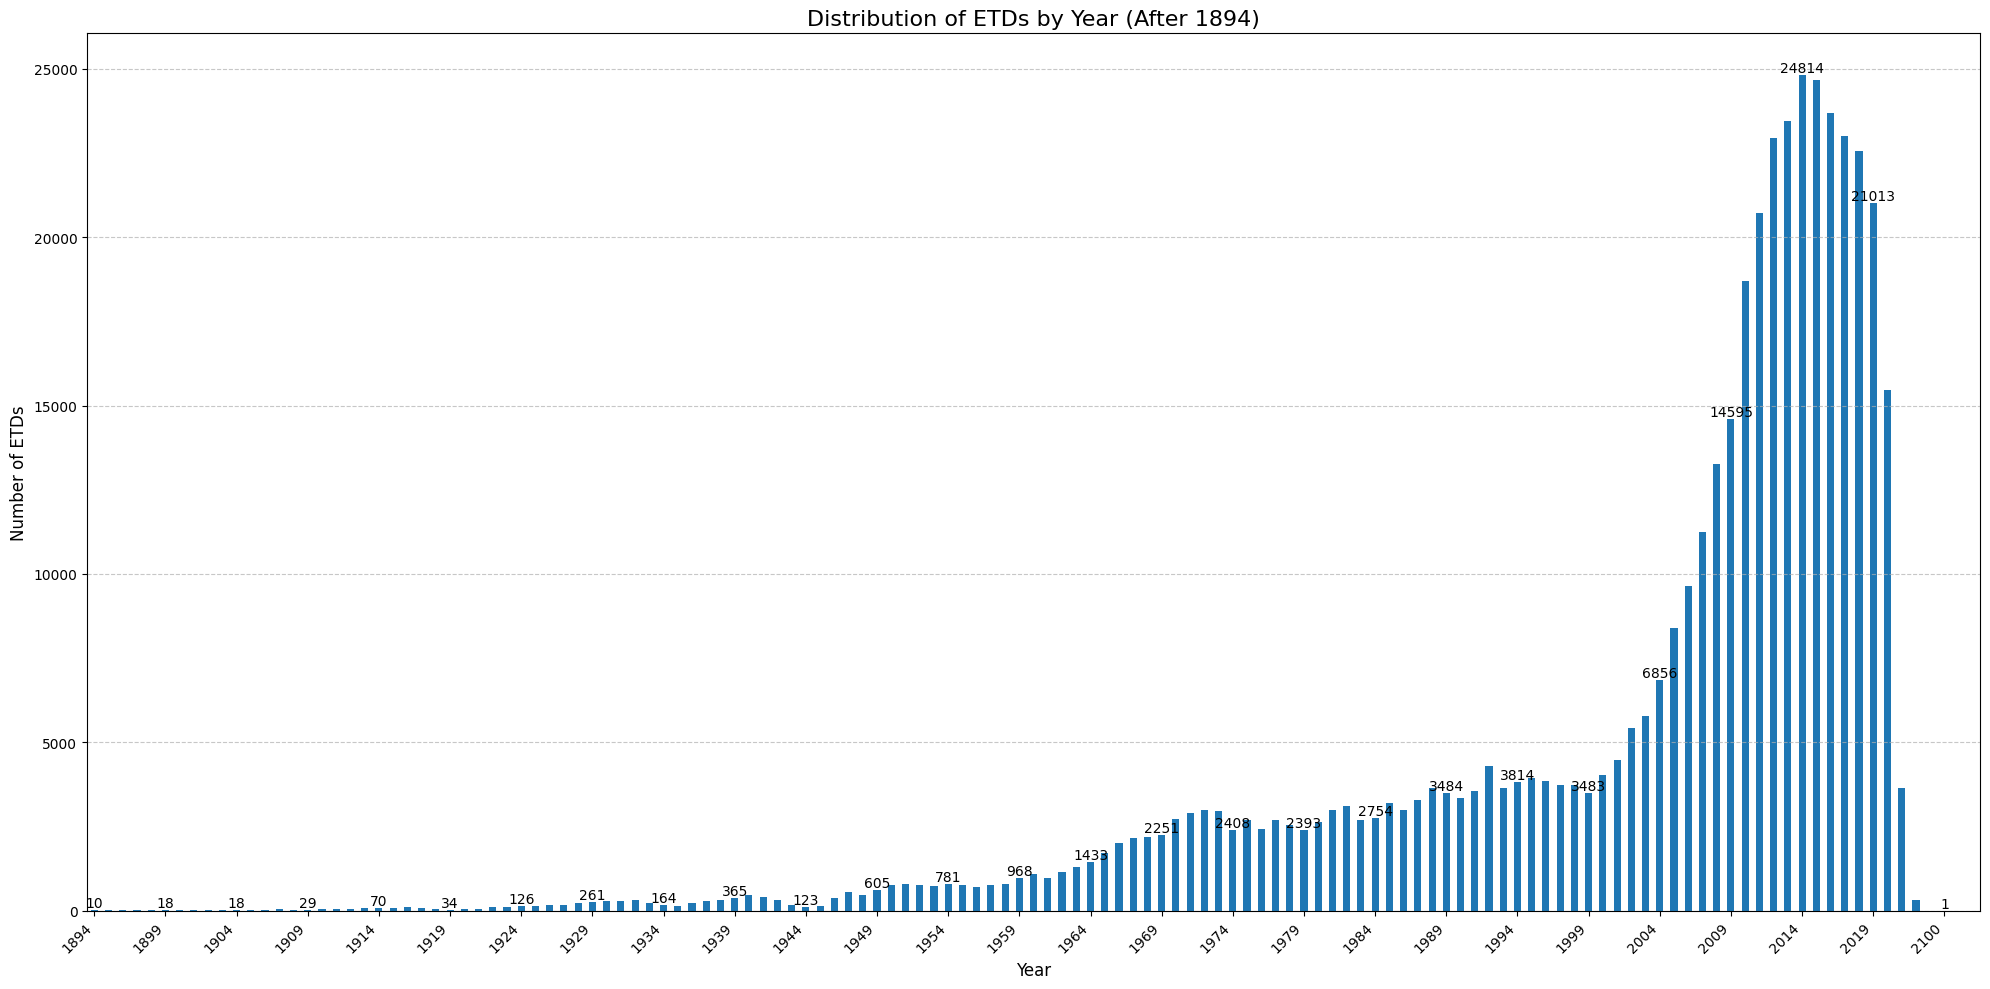

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert year to integer and filter for years 1894 and later
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
year_counts = df[df['year'] >= 1894]['year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
ax = year_counts.plot(kind='bar')

plt.title('Distribution of ETDs by Year (After 1894)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)

# Set x-ticks to show every 5 years
tick_positions = range(0, len(year_counts), 5)
tick_labels = [str(year_counts.index[i]) for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.subplots_adjust(bottom=0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels on top of each bar for years divisible by 10
# for i, (year, count) in enumerate(year_counts.items()):
#     if year % 10 == 0:
#         ax.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

# Optionally, add value labels on top of each bar
for i, v in enumerate(year_counts):
    if i % 5 == 0:  # Only label every 5th bar to reduce clutter
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

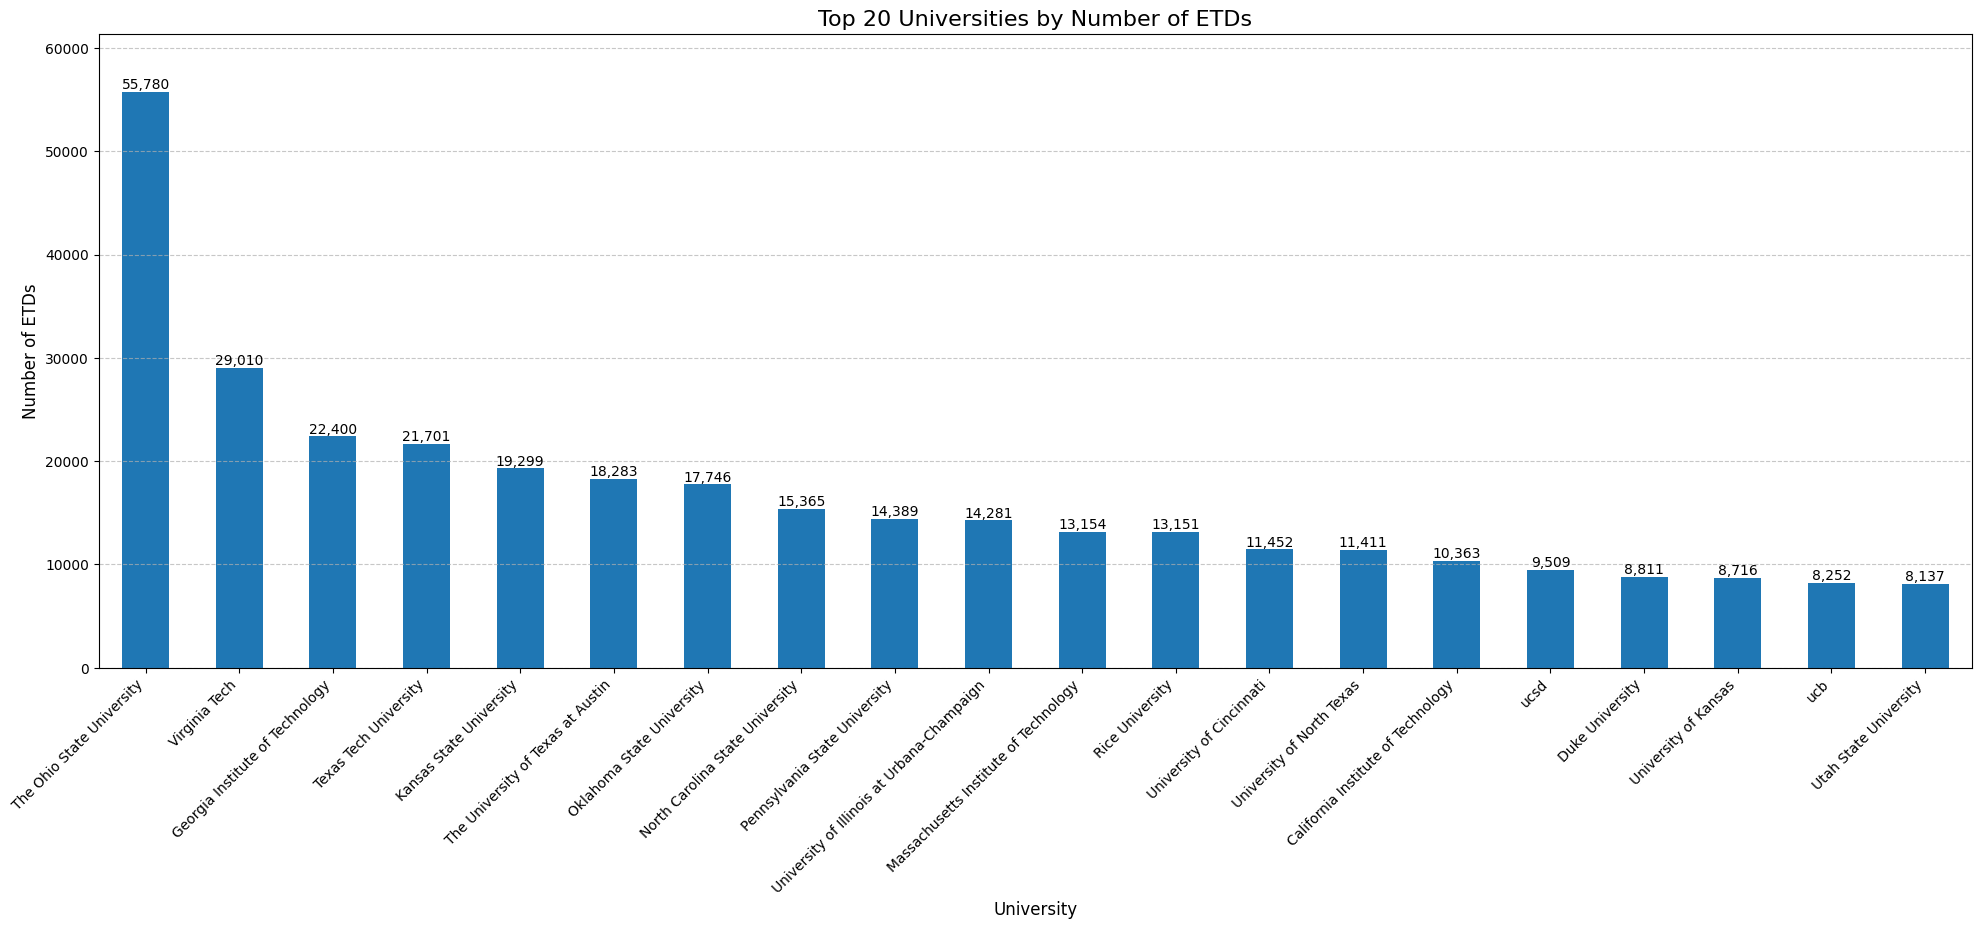

university
The Ohio State University                     55780
Virginia Tech                                 29010
Georgia Institute of Technology               22400
Texas Tech University                         21701
Kansas State University                       19299
The University of Texas at Austin             18283
Oklahoma State University                     17746
North Carolina State University               15365
Pennsylvania State University                 14389
University of Illinois at Urbana-Champaign    14281
Massachusetts Institute of Technology         13154
Rice University                               13151
University of Cincinnati                      11452
University of North Texas                     11411
California Institute of Technology            10363
ucsd                                           9509
Duke University                                8811
University of Kansas                           8716
ucb                                            8252
U

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Get top 20 universities
top_universities = df['university'].value_counts().head(20)

plt.figure(figsize=(20, 10))
ax = top_universities.plot(kind='bar')

plt.title('Top 20 Universities by Number of ETDs', fontsize=16)
plt.xlabel('University', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_universities):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add some extra space at the top for the labels
plt.subplots_adjust(top=0.9)

# Increase y-axis limit slightly to accommodate labels
plt.ylim(0, max(top_universities) * 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the data
print(top_universities)

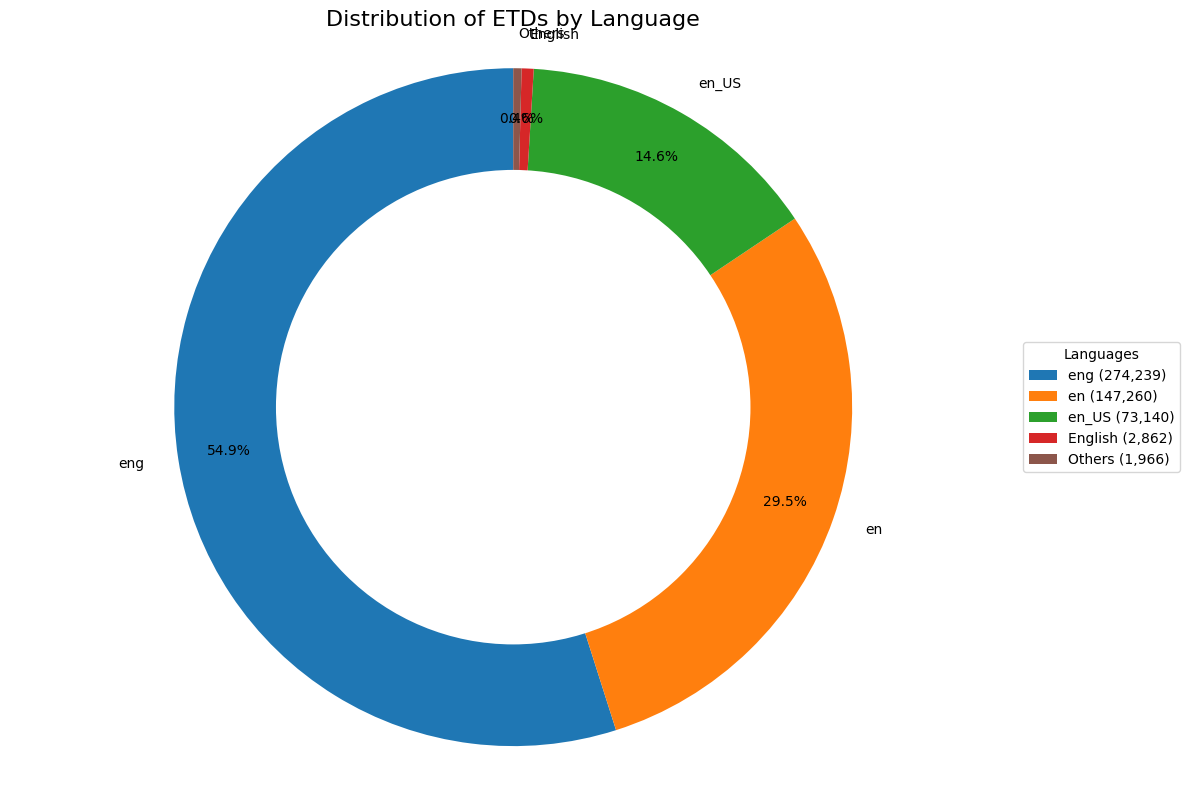

eng        274239
en         147260
en_US       73140
English      2862
Others       1966
dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
language_counts = df['language'].value_counts()

# Get top 4 languages
top_4 = language_counts.head(4)

# Sum up the rest as 'Others'
others = pd.Series({'Others': language_counts[4:].sum()})

# Combine top 4 and others
plot_data = pd.concat([top_4, others])

# Create color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b']

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(plot_data, 
                                   labels=plot_data.index, 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   pctdistance=0.85)

# Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of ETDs by Language', fontsize=16)

# Add legend with counts
legend_labels = [f'{label} ({count:,})' for label, count in plot_data.items()]
plt.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print the data
print(plot_data)

In [13]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your dataframe
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate total number of different languages
total_languages = len(language_counts)

# Create the markdown table
markdown_table = tabulate(language_counts, headers='keys', tablefmt='pipe', showindex=False)

# Print the markdown table
print("## Language Distribution Table")
print(markdown_table)

print(f"\nTotal number of different languages: {total_languages}")

## Language Distribution Table
| Language               |   Count |
|:-----------------------|--------:|
| eng                    |  274239 |
| en                     |  147260 |
| en_US                  |   73140 |
| English                |    2862 |
| EN                     |    1018 |
| en-US                  |     347 |
| spa                    |     200 |
| fre                    |     127 |
| es                     |     111 |
| ger                    |      49 |
| fr                     |      34 |
| de                     |      19 |
| deu                    |      18 |
| Dissertations & Theses |      11 |
| haw                    |       7 |
| SP                     |       5 |
| other                  |       3 |
| it                     |       2 |
| es_US                  |       2 |
| pt                     |       2 |
| sp                     |       1 |
| por                    |       1 |
| esp                    |       1 |
| US_en                  |       1 |
| fra  

In [12]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
